# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cancer_patient.csv")

In [3]:
df.head()

,index,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient_Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air_Pollution             1000 non-null   int64 
 5   Alcohol_use               1000 non-null   int64 
 6   Dust_Allergy              1000 non-null   int64 
 7   OccuPational_Hazards      1000 non-null   int64 
 8   Genetic_Risk              1000 non-null   int64 
 9   chronic_Lung_Disease      1000 non-null   int64 
 10  Balanced_Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive_Smoker            1000 non-null   int64 
 14  Chest_Pain               

# DATA PREPARATION

In [5]:
independen = [col for col in df.columns != 'Level']
defenden = 'Level'

# Transformasi Data

In [7]:
# memisahkan numerik dan kategori
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerical.append(col)
    elif df[col].dtype == 'int64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
numerical

['index',
 'Age',
 'Gender',
 'Air_Pollution',
 'Alcohol_use',
 'Dust_Allergy',
 'OccuPational_Hazards',
 'Genetic_Risk',
 'chronic_Lung_Disease',
 'Balanced_Diet',
 'Obesity',
 'Smoking',
 'Passive_Smoker',
 'Chest_Pain',
 'Coughing_of_Blood',
 'Fatigue',
 'Weight_Loss',
 'Shortness_of_Breath',
 'Wheezing',
 'Swallowing_Difficulty',
 'Clubbing_of_Finger_Nails',
 'Frequent_Cold',
 'Dry_Cough',
 'Snoring']

In [9]:
catgcols

['Patient_Id', 'Level']

In [10]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [11]:
df['Patient_Id'].value_counts()

P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient_Id, Length: 1000, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [13]:
df['Level'] = le.fit_transform(df['Level'])

In [16]:
df.head()

,index,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,0,0,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,1,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,2,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,3,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,4,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


In [17]:
df.to_csv('LungCancer.csv')

In [18]:
df['Level'].value_counts()

0    365
2    332
1    303
Name: Level, dtype: int64

In [19]:
df['Patient_Id'].value_counts()

0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: Patient_Id, Length: 1000, dtype: int64

# Split data

In [20]:
X = df.drop(columns=['Level', 'index', 'Frequent_Cold', 'Snoring'], axis=1)
Y = df['Level']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, x_train.shape, x_test.shape)

(1000, 22) (800, 22) (200, 22)


# MODELLING DATA

# Membuat model training

In [23]:
desicion = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [24]:
model = desicion.fit(x_train, y_train)

# EVALUATION 

# Evaluasi model

In [25]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [26]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.99125


In [27]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [28]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.985


# Visualisasi Data

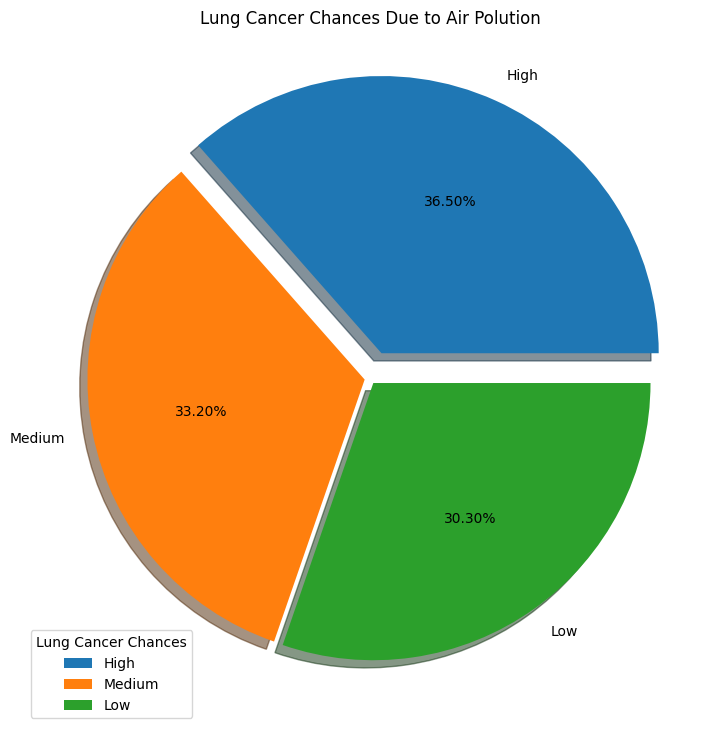

In [29]:
plt.figure(figsize = (11, 9))
plt.title("Lung Cancer Chances Due to Air Polution")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

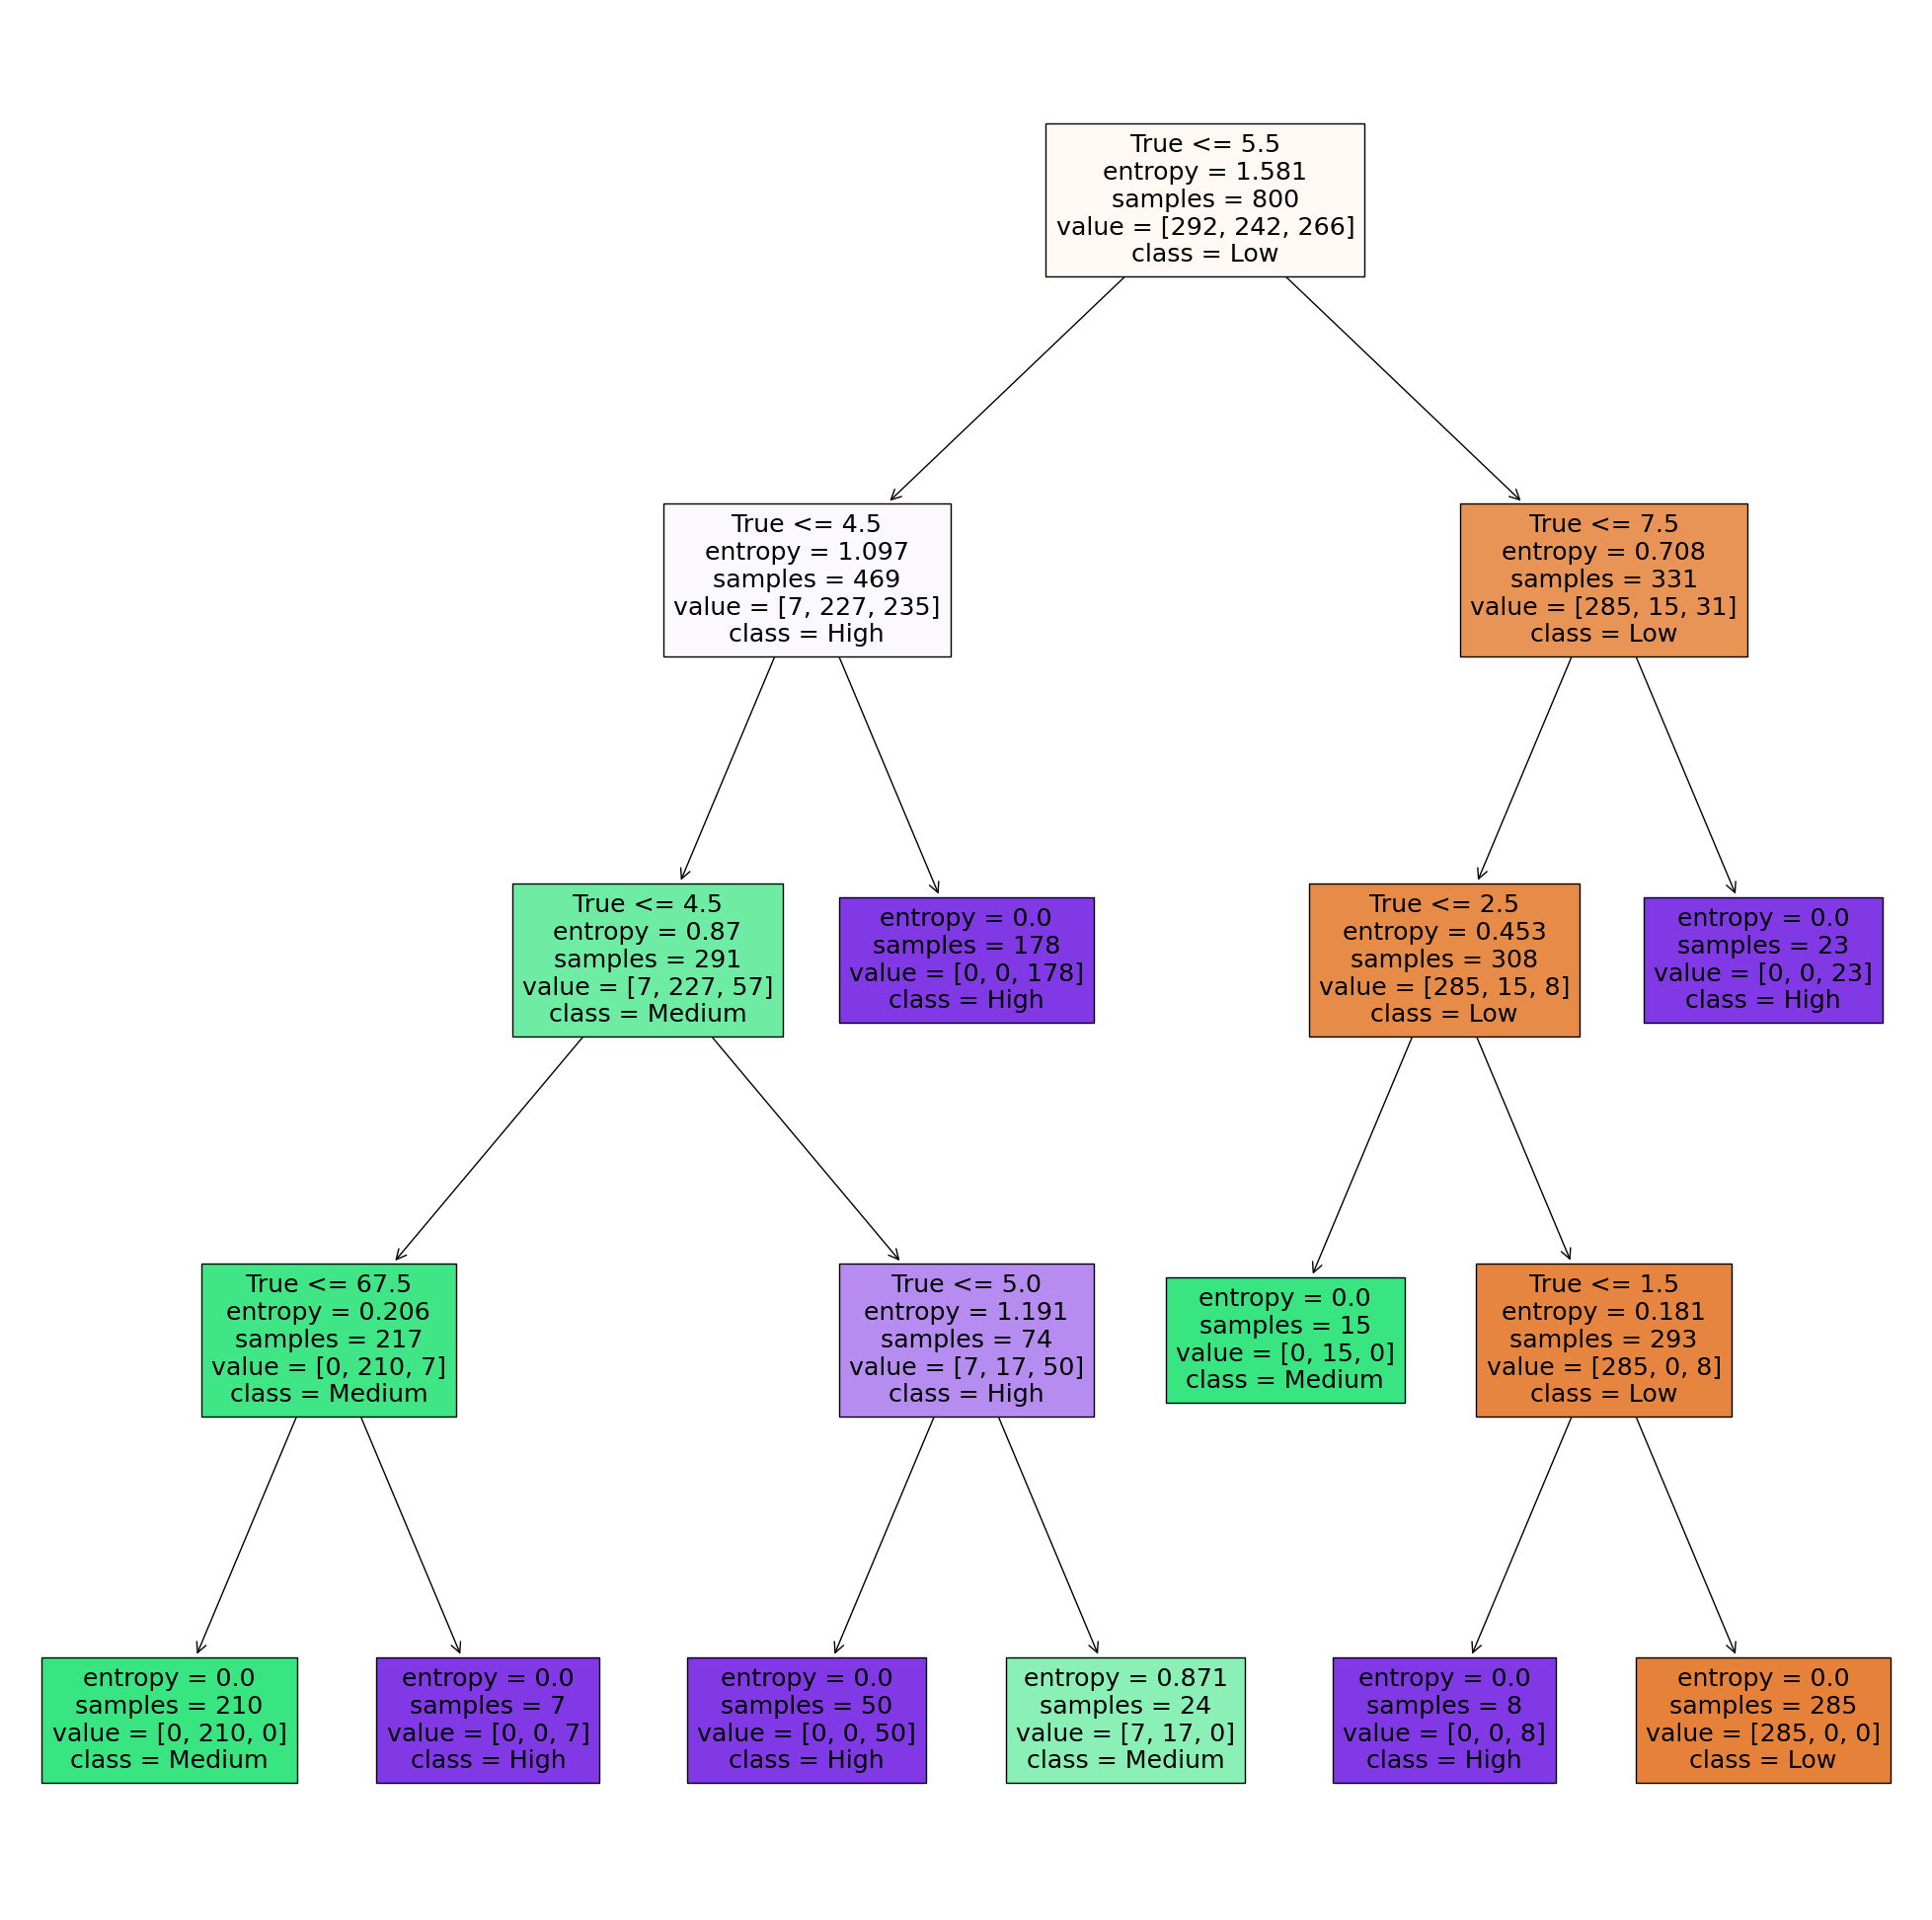

In [30]:
fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(
    model,
    feature_names = independen,
    class_names = ['Low', 'Medium', 'High'],
    filled = True)

# Model Prediksi

In [31]:
input_data = (1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,7)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Tinggi')
elif(prediksi == 2):
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Sedang')
else:
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Rendah')

[2]
Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Sedang


c:\Users\Irpan\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# Save Model

In [32]:
import pickle

filename = 'LungCancer.sav'
pickle.dump(model, open(filename, 'wb'))